<a href="https://colab.research.google.com/github/justtcodingg/Marine-Bio-Acoustic-Research-Project/blob/main/Copy_of_MARINECO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install resampy;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.6 MB/s eta 0:00:00


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/allabels.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/allabels.zip
  inflating: allabels/0.wav          
  inflating: allabels/1.wav          
  inflating: allabels/10.wav         
  inflating: allabels/100.wav        
  inflating: allabels/101.wav        
  inflating: allabels/102.wav        
  inflating: allabels/103.wav        
  inflating: allabels/104.wav        
  inflating: allabels/105.wav        
  inflating: allabels/106.wav        
  inflating: allabels/107.wav        
  inflating: allabels/108.wav        
  inflating: allabels/109.wav        
  inflating: allabels/11.wav         
  inflating: allabels/110.wav        
  inflating: allabels/111.wav        
  inflating: allabels/112.wav        
  inflating: allabels/113.wav        
  inflating: allabels/114.wav        
  inflating: allabels/115.wav        
  inflating: allabels/116.wav        
  inflating: allabels/117.wav        
  inflating: allabels/118.wav        
  inflating: allabels/119.wav        
  inflating: allabels/12.w

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Marine Data (5).csv')

# Strip whitespace from the 'Class' column
df['Class'] = df['Class'].str.strip()



# Save the cleaned DataFrame back to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Marine DataCLEAN (5).csv', index=False)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Marine DataCLEAN (5).csv')
df.head()


,id,Class
0,0,foghorn
1,1,foghorn
2,2,foghorn
3,3,foghorn
4,4,foghorn


In [ ]:
ipd.Audio('allabels/1.wav')

In [ ]:
data, sampling_rate = librosa.load('allabels/1.wav',sr = None)


In [ ]:
data_size = data.shape[0]
print("Size of data array:", data_size)

Size of data array: 731417


In [ ]:
data_size

731417

In [ ]:
sampling_rate

96000

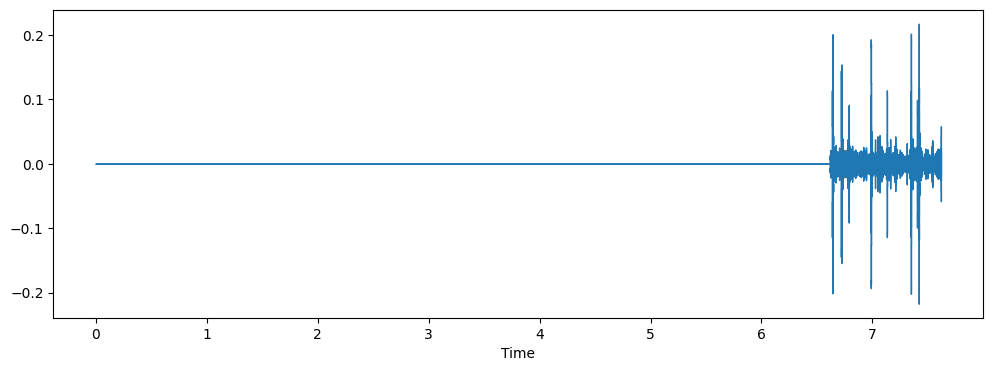

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)



Class: foghorn


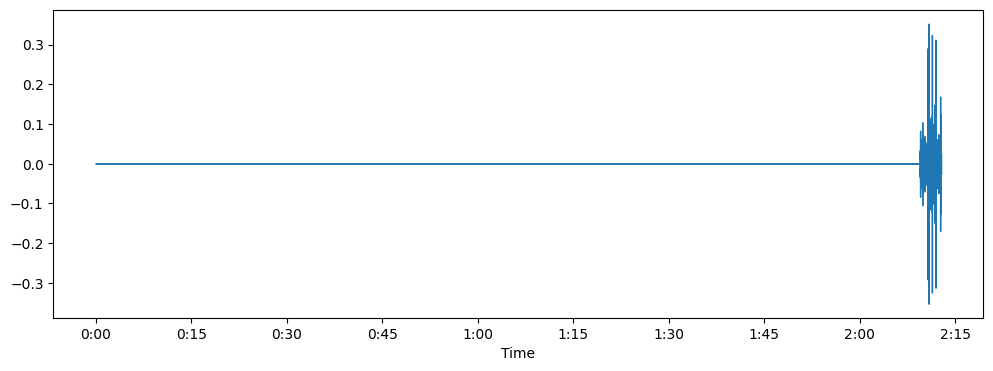

In [ ]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('allabels/'+str(df['id'][index]) + '.wav', sr = None)

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: drum


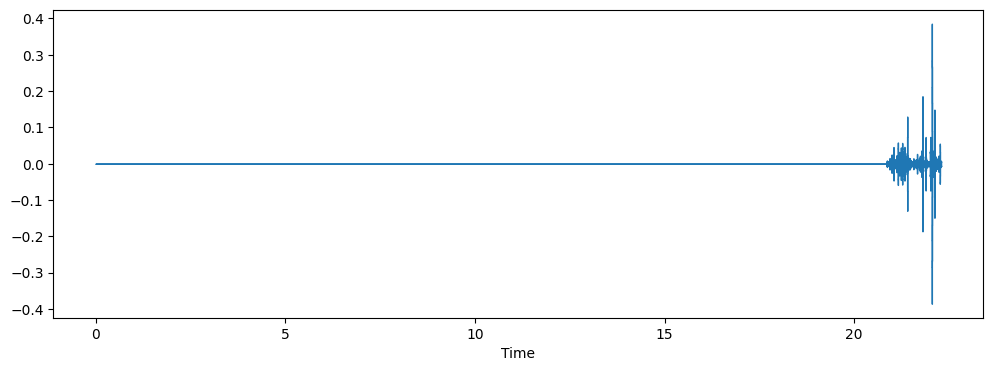

In [ ]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('allabels/'+str(df['id'][index]) + '.wav',sr = None)

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

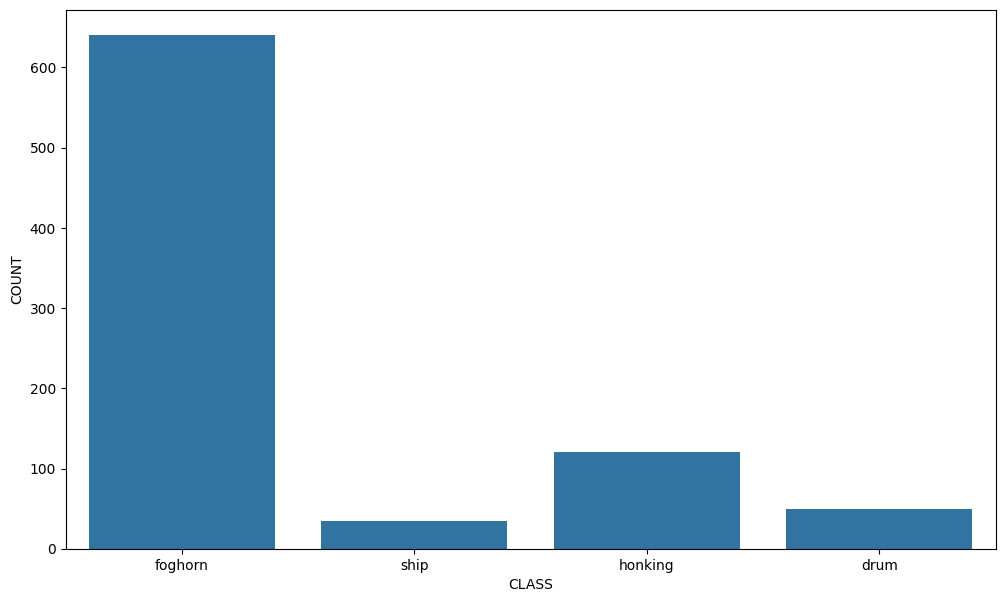

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,7))
#sns.countplot(df['Class'])


sns.countplot(x='Class', data=df)
plt.xlabel('CLASS')
plt.ylabel('COUNT')

# Display the plot
plt.show()

In [ ]:
df['Class'].value_counts()

foghorn    640
honking    121
drum        50
ship        35
Name: Class, dtype: int64

In [ ]:
df['Class'].unique()

array(['foghorn', 'ship', 'honking', 'drum'], dtype=object)

In [ ]:
import os

def parser(row):
  # path of the file
  file_name = os.path.join('allabels', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)

  feature = mfccs
  label = row.Class

  return [feature, label]

In [ ]:
data = df.apply(parser, axis=1)
data.columns = ['feature','label']

In [ ]:
data[0]

[array([-5.2251538e+02,  9.1487274e+01,  4.1142490e+01,  2.2620241e-01,
        -1.1745275e+01, -8.0979300e-01,  1.1724410e+01,  1.1363436e+01,
         1.2830644e+00, -5.9459658e+00, -3.3970439e+00,  4.1438541e+00,
         7.5250082e+00,  4.1449618e+00, -7.6131493e-01, -1.8789955e+00,
         5.8333147e-01,  2.7924836e+00,  1.9996526e+00, -6.7919010e-01,
        -1.9478374e+00, -8.8861042e-01,  4.7839549e-01,  4.5155415e-01,
        -9.0580803e-01, -2.1548476e+00, -2.0994024e+00, -1.2149534e+00,
        -5.5377072e-01, -5.1715094e-01, -7.2216368e-01, -5.8813900e-01,
        -2.1878624e-01,  1.2400927e-01,  4.1446778e-01,  6.3944173e-01,
         9.4848156e-01,  1.1796790e+00,  9.8293430e-01,  4.6840522e-01],
       dtype=float32),
 'foghorn']

In [ ]:
data.head()

0    [[-522.5154, 91.487274, 41.14249, 0.22620241, ...
1    [[-755.7277, 30.1732, 12.112091, -2.899048, -4...
2    [[-751.967, 15.874058, 6.728951, -0.8555198, -...
3    [[-759.9941, 7.69081, 3.241984, -0.46449858, -...
4    [[-769.5092, 4.6829395, 1.9333912, -0.32755908...
dtype: object

In [ ]:
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])

In [ ]:
X.shape

(846, 40)

In [ ]:
y

array(['foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'ship', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'ship', 'ship', 'ship', 'foghorn', 'ship', 'ship', 'ship',
       'foghorn', 'ship', 'honking', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'foghorn',
       'foghorn', 'foghorn', 'foghorn', 'honking', 'foghorn', 'foghorn',
       'foghorn', 'honking', 'drum', 'ship', 'ship', 'ship', 'foghorn',
       'ship', 'foghorn', 'foghorn', 'foghorn', 'foghorn', 'drum'

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42,shuffle=True)

In [ ]:
y_train.shape

(719, 4)

In [ ]:
X_train.shape

(719, 40)

In [ ]:
X_test.shape

(127, 40)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam
num_classes = 4

# model creation
model = Sequential()


model.add(Conv1D(32, kernel_size=(3),activation = 'relu', input_shape = (40,1)))

model.add(Conv1D(32, kernel_size=(3),activation = 'relu'))

#model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, kernel_size=(3),activation = 'relu'))

#model.add(Conv1D(64, kernel_size=(3),activation = 'relu'))

#model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=(3),activation = 'relu'))

#model.add(Conv1D(128, kernel_size=(3),activation = 'relu'))

model.add(Flatten())
#1st dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#2nd dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#3rd  dense layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#4th dense layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))
opt = Adam(learning_rate=0.003)

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 38, 32)            128       
                                                                 
 conv1d_33 (Conv1D)          (None, 36, 32)            3104      
                                                                 
 conv1d_34 (Conv1D)          (None, 34, 64)            6208      
                                                                 
 conv1d_35 (Conv1D)          (None, 32, 128)           24704     
                                                                 
 flatten_8 (Flatten)         (None, 4096)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               524416    
                                                                 
 activation_32 (Activation)  (None, 128)              

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = [EarlyStopping(monitor = 'val_accuracy',
                              verbose = 1,
                              restore_best_weights=True,
                              mode="max",
                              patience = 5),
                ModelCheckpoint('marineco1.h5',
                                monitor="val_accuracy",
                                verbose=1,
                                save_best_only=True,
                                mode="max")]

In [ ]:
model.fit(X_train, y_train, batch_size=36, epochs=75, validation_split=0.32,callbacks=[checkpointer])

Epoch 1/75
13/14 [==========================>...] - ETA: 0s - loss: 0.3182 - accuracy: 0.8611
Epoch 1: val_accuracy did not improve from 0.79358
14/14 [==============================] - 0s 23ms/step - loss: 0.3163 - accuracy: 0.8648 - val_loss: 1.7178 - val_accuracy: 0.7835
Epoch 2/75
13/14 [==========================>...] - ETA: 0s - loss: 0.3427 - accuracy: 0.8440
Epoch 2: val_accuracy did not improve from 0.79358
14/14 [==============================] - 0s 22ms/step - loss: 0.3497 - accuracy: 0.8463 - val_loss: 1.9097 - val_accuracy: 0.7706
Epoch 3/75
13/14 [==========================>...] - ETA: 0s - loss: 0.3450 - accuracy: 0.8504
Epoch 3: val_accuracy did not improve from 0.79358
14/14 [==============================] - 0s 22ms/step - loss: 0.3434 - accuracy: 0.8504 - val_loss: 1.9222 - val_accuracy: 0.7792
Epoch 4/75
13/14 [==========================>...] - ETA: 0s - loss: 0.3774 - accuracy: 0.8526
Epoch 4: val_accuracy did not improve from 0.79358
14/14 [=======================

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print(test_accuracy[1])

4/4 [==============================] - 0s 6ms/step - loss: 1.5995 - accuracy: 0.8504
0.8503937125205994


In [ ]:
model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


array([[0.10922855, 0.5341645 , 0.28200373, 0.07460319],
       [0.08840898, 0.5785183 , 0.27757418, 0.05549861],
       [0.09886395, 0.5559709 , 0.28034893, 0.06481636],
       [0.09682921, 0.5579422 , 0.2802228 , 0.06500577],
       [0.10325328, 0.5466247 , 0.2811617 , 0.06896021],
       [0.10250274, 0.54804724, 0.2810377 , 0.0684123 ],
       [0.11122986, 0.5312822 , 0.27239454, 0.08509337],
       [0.09020428, 0.57458454, 0.27813116, 0.05708005],
       [0.09672248, 0.56249034, 0.26694658, 0.07384057],
       [0.11620722, 0.5244319 , 0.2751085 , 0.08425245],
       [0.03984607, 0.7489862 , 0.18447995, 0.02668784],
       [0.02949429, 0.7967216 , 0.15517734, 0.01860678],
       [0.10562238, 0.5414017 , 0.2815272 , 0.07144868],
       [0.07952766, 0.5981065 , 0.27416942, 0.04819639],
       [0.03995398, 0.74134064, 0.19125888, 0.0274464 ],
       [0.05051013, 0.7045167 , 0.20861986, 0.03635328],
       [0.10927851, 0.5366157 , 0.26736385, 0.08674193],
       [0.08880045, 0.5777047 ,

In [ ]:
filename="alllabels/10.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features),axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-7.43435913e+02  6.70668304e-01 -7.81139266e-03 -1.11546069e-01
  1.03200994e-01  8.11848044e-02 -5.95587604e-02 -2.15951130e-02
  6.31054938e-02  2.22608671e-02 -2.76736319e-02 -1.61930639e-03
  1.62783805e-02 -1.93179504e-03 -2.28824792e-03  7.98246358e-03
 -8.17396329e-04 -9.55487415e-03 -3.55162611e-03 -8.79013329e-04
 -6.80835778e-03 -1.07313003e-02 -9.93764307e-03 -5.01695415e-03
  3.80478054e-03  9.86518245e-03  8.58735200e-03  4.95415088e-03
  3.10248788e-03  1.33189512e-03 -1.47426338e-03 -3.51316971e-03
 -4.66035167e-03 -4.88370610e-03 -1.22679072e-03  6.17604610e-03
  8.74943845e-03  2.86907470e-03 -7.44197401e-04  4.71547293e-03]
[[-7.43435913e+02  6.70668304e-01 -7.81139266e-03 -1.11546069e-01
   1.03200994e-01  8.11848044e-02 -5.95587604e-02 -2.15951130e-02
   6.31054938e-02  2.22608671e-02 -2.76736319e-02 -1.61930639e-03
   1.62783805e-02 -1.93179504e-03 -2.28824792e-03  7.98246358e-03
  -8.17396329e-04 -9.55487415e-03 -3.55162611e-03 -8.79013329e-04
  -6.80835778e-03 -

array(['foghorn'], dtype='<U16')